## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import missingno as msno
import matplotlib.pyplot as plt
import json

## GETTING THE CSV FILE 

In [3]:
# loading the csv data 
heart_data = pd.read_csv('heart_disease_data.csv')

## DATA INSPECTION AND CLEANING

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# getting some info about the data
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Getting the staticstics about the different data
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [13]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


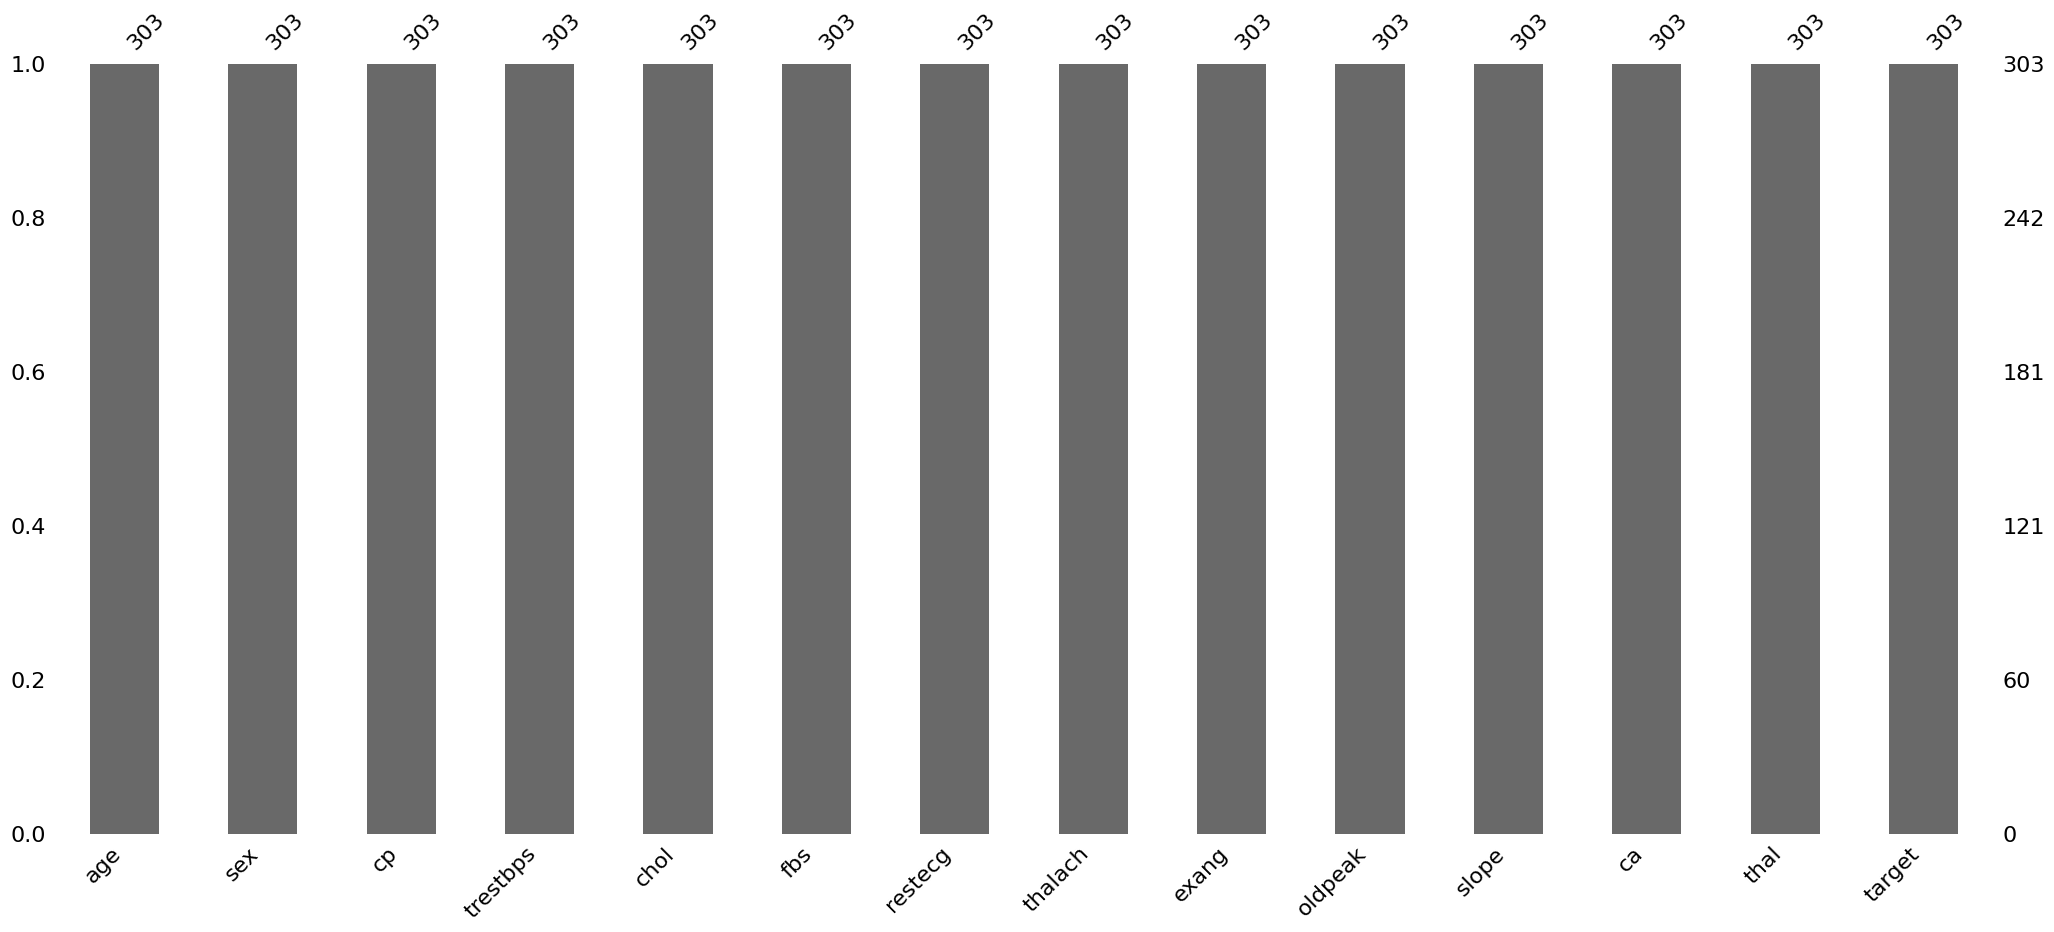

In [15]:
# Checking what data should be discarded using not null sum
msno.bar(heart_data)
plt.show()

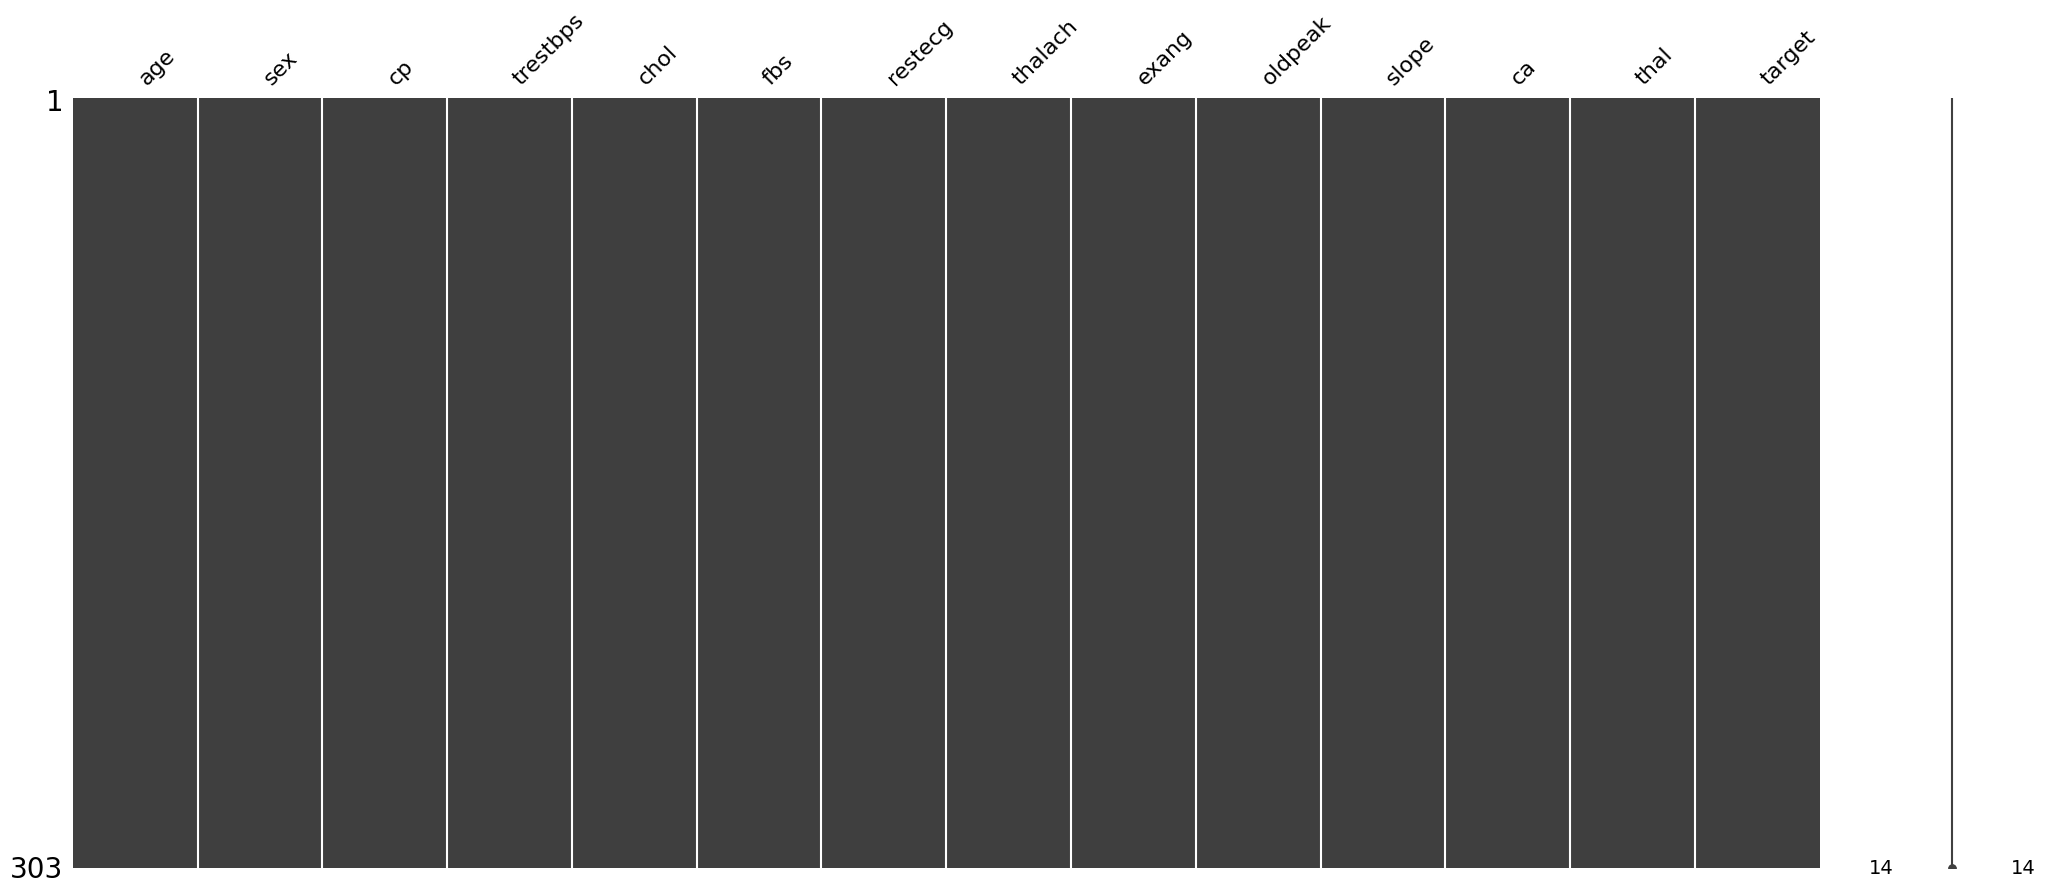

In [16]:
#Checking which columns to drop using bar charts
msno.matrix(heart_data)
#msno.heatmap(df)
plt.show()

In [17]:
#Drop the columns if the missing values are more than 10%
heart_data = heart_data.dropna()

In [18]:
#Checking for duplicates
heart_data.duplicated().sum()
#Dropping all the duplicates
heart_data = heart_data.drop_duplicates()

<Axes: ylabel='proportion'>

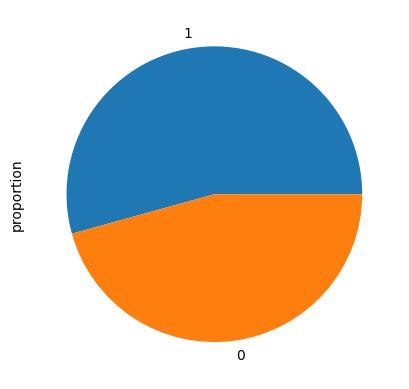

In [19]:
#Checking how many have got heart failures
heart_data['target'].value_counts(normalize=True).plot(kind = 'pie')

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y, random_state=2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (151, 13) (152, 13)


In [86]:
model = LogisticRegression()

In [87]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\DTC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [89]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8807947019867549


In [90]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [91]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8355263157894737


In [136]:
input_data=[]
# Load the JSON file containing input data
with open('data.json', 'r') as file:
    data = json.load(file)

    for i in data['data']:
        input_data.append(data['data'][i])


input_data_as_numpy_array= np.asarray(input_data)
print(input_data_as_numpy_array)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]
[0]
The Person does not have a Heart Disease


C:\Users\DTC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [122]:
def testing_prediction(input):
    # Load the JSON file containing input data
    #with open('data.json', 'r') as file:
        #data = json.load(file)
    
       # for i in data['data']:
          #  input_data.append(data['data'][i])

    input_data_as_numpy_array= np.asarray(input)
    #print(input_data_as_numpy_array)
    #reshape the numpy array as we are predicting for only on instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
    
    prediction = model.predict(input_data_reshaped)
    print("Prediction: " , prediction)

    if (prediction[0]== 0):
        
        print('The Person does not have a Heart Disease')
        
    else:
        print('The Person has the possibility to have a Heart Disease')
    print('Accuracy on Training data : ',round(training_data_accuracy*100,2),"%")
    print('Accuracy on Test data : ',round(test_data_accuracy*100,2),"%")
    

In [138]:
heart_data[2:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [139]:

testing_prediction([41 	,0 	,1 	,130 	,204 	,0 	,0 	,172 	,0 ,	1.4 	,2 	,0 ,2 ])

Prediction:  [1]
The Person has Heart Disease
Accuracy on Training data :  88.08 %
Accuracy on Test data :  83.55 %


C:\Users\DTC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [140]:
x = 170
heart_data[x:x+1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


In [142]:
x = 189
heart_data[x:x+1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0


In [143]:
testing_prediction([51 ,	0, 	0, 	130 ,	305 ,	0 ,	1 ,	142 ,	1, 	1.2 	,1 	,0 	,3])

Prediction:  [0]
The Person does not have a Heart Disease
Accuracy on Training data :  88.08 %
Accuracy on Test data :  83.55 %


C:\Users\DTC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
